### Análise de Sentimentos

Continuando com o mesmo dataset, optei por fazer uma análise de sentimentos das 10 músicas mais populares.

In [24]:
import pandas as pd
import nltk
import numpy as np
import random
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
from matplotlib import pyplot as plt

In [39]:
data = pd.read_csv('song_lyrics.csv', sep=';')

In [40]:
data.head(10)

,song_name,artist_name,song_popularity,lyrics
0,Happier,Marshmello,100,lately i have been i have been thinking i want...
1,I Love It (& Lil Pump),Kanye West,99,cause you know in the old days they could not ...
2,Promises (with Sam Smith),Calvin Harris,98,are you drunk enough not to judge what i am do...
3,Eastside (with Halsey & Khalid),benny blanco,98,uh yeah yeah when i was young i fell in love w...
4,SICKO MODE,Travis Scott,97,astro yeah sun is down freezing cold that is h...
5,In My Mind,Dynoro,97,in my mind in my head this is where we all cam...
6,Falling Down,Lil Peep,97,come let is watch the rain as it is falling do...
7,Moonlight,XXXTENTACION,96,yeah spotlight uh moonlight uh nigga why you t...
8,SAD!,XXXTENTACION,96,yeah who am i someone that's afraid to let go ...
9,FEFE (feat. Nicki Minaj & Murda Beatz),6ix9ine,96,it is fucking it is king of new york looking f...


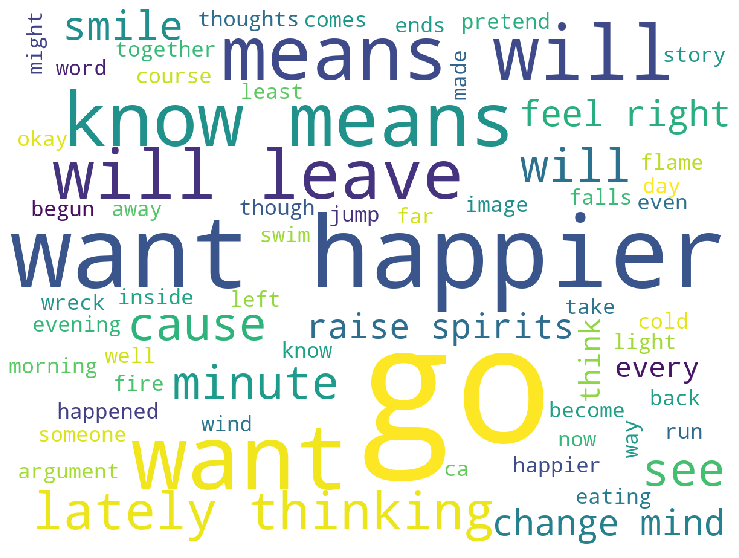

In [43]:
#Wordcloud Happier
from wordcloud import WordCloud, STOPWORDS
text = (str(data.loc[0, 'lyrics']))
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color='white',width=1200,height=900).generate(text)
plt.imshow(wordcloud)
plt.title('')
plt.axis('off')
plt.show()

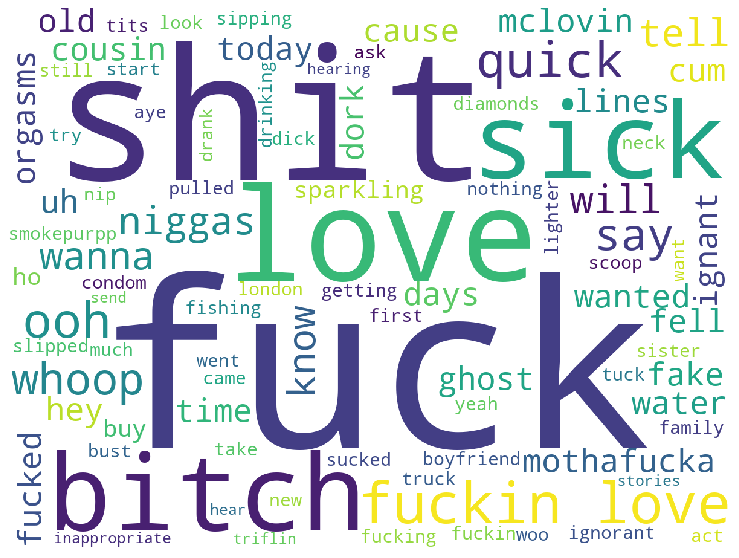

In [44]:
#wordcloud I love it
from wordcloud import WordCloud, STOPWORDS
text = (str(data.loc[1, 'lyrics']))
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color='white',width=1200,height=900).generate(text)
plt.imshow(wordcloud)
plt.title('')
plt.axis('off')
plt.show()

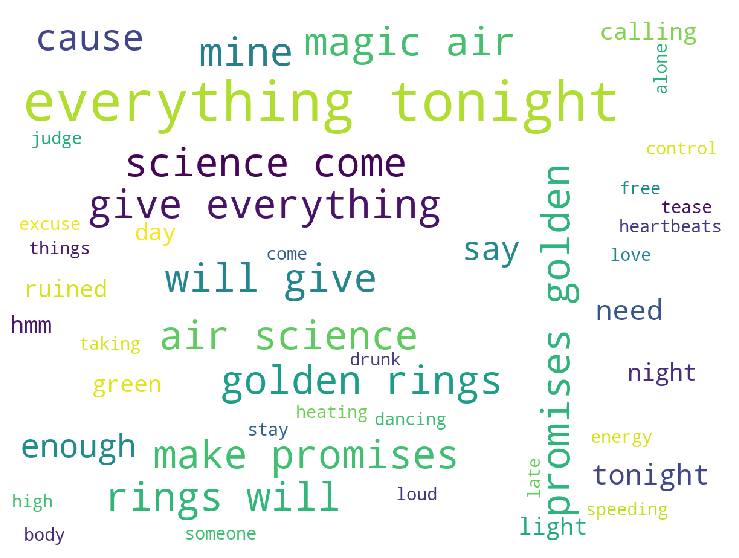

In [45]:
#Promises
from wordcloud import WordCloud, STOPWORDS
text = (str(data.loc[2, 'lyrics']))
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color='white',width=1200,height=900).generate(text)
plt.imshow(wordcloud)
plt.title('')
plt.axis('off')
plt.show()

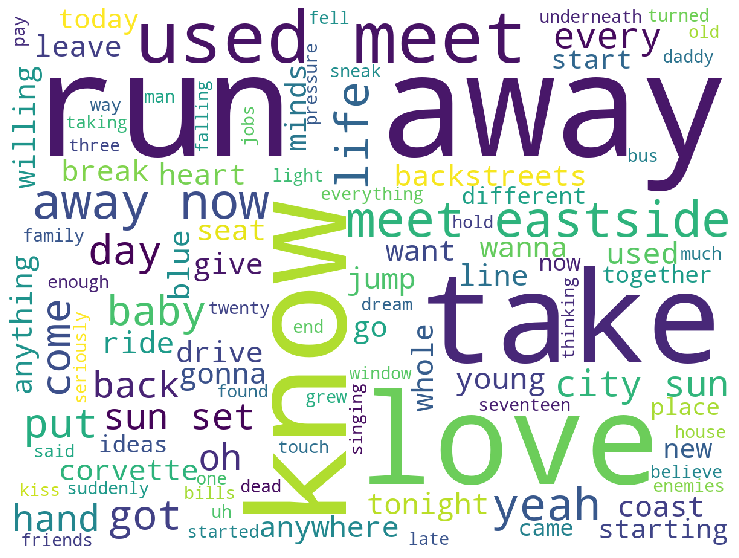

In [46]:
#Eastside
from wordcloud import WordCloud, STOPWORDS
text = (str(data.loc[3, 'lyrics']))
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color='white',width=1200,height=900).generate(text)
plt.imshow(wordcloud)
plt.title('')
plt.axis('off')
plt.show()

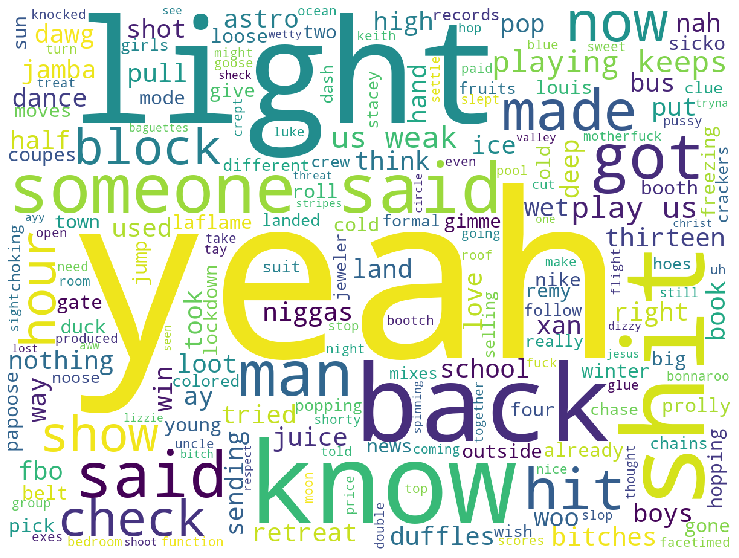

In [47]:
#Sickomode
from wordcloud import WordCloud, STOPWORDS
text = (str(data.loc[4, 'lyrics']))
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color='white',width=1200,height=900).generate(text)
plt.imshow(wordcloud)
plt.title('')
plt.axis('off')
plt.show()

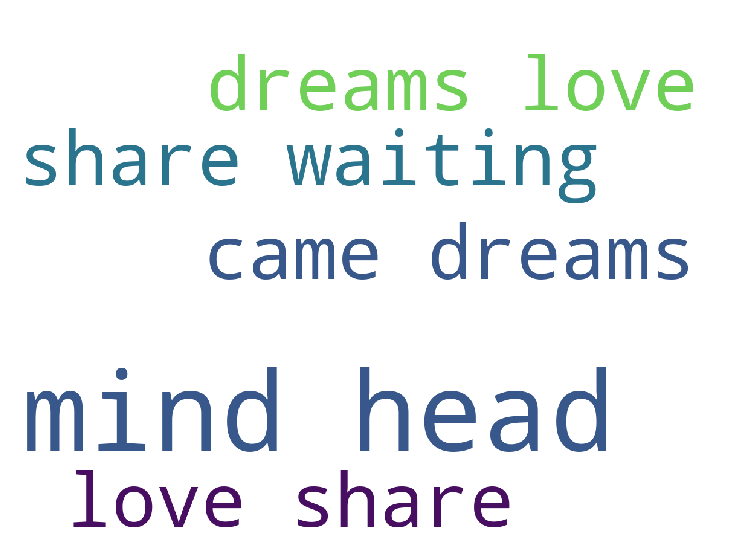

In [48]:
#In my mind
from wordcloud import WordCloud, STOPWORDS
text = (str(data.loc[5, 'lyrics']))
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color='white',width=1200,height=900).generate(text)
plt.imshow(wordcloud)
plt.title('')
plt.axis('off')
plt.show()

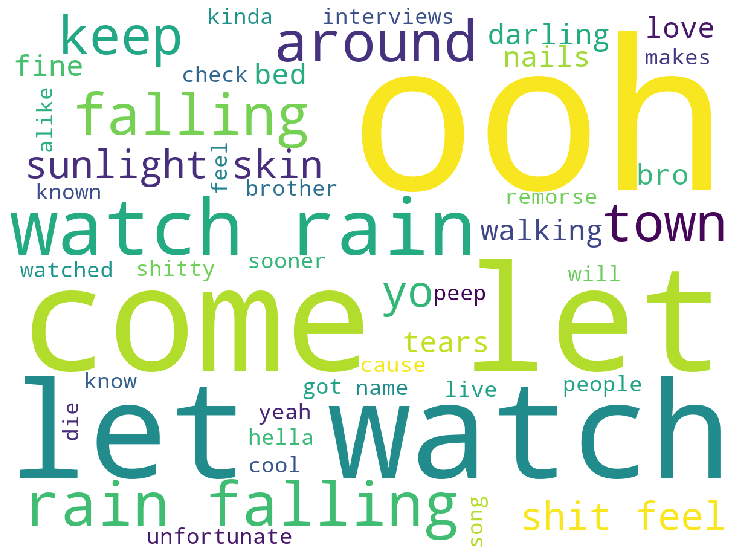

In [49]:
from wordcloud import WordCloud, STOPWORDS
text = (str(data.loc[6, 'lyrics']))
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color='white',width=1200,height=900).generate(text)
plt.imshow(wordcloud)
plt.title('')
plt.axis('off')
plt.show()

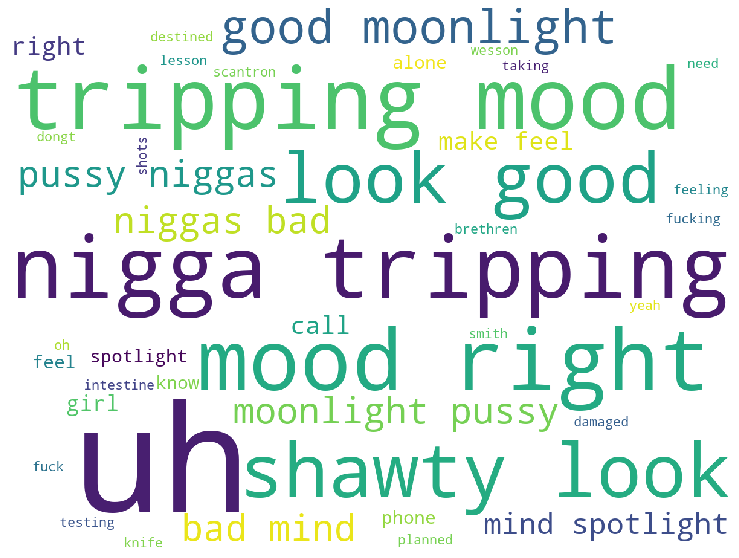

In [50]:
from wordcloud import WordCloud, STOPWORDS
text = (str(data.loc[7, 'lyrics']))
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color='white',width=1200,height=900).generate(text)
plt.imshow(wordcloud)
plt.title('')
plt.axis('off')
plt.show()

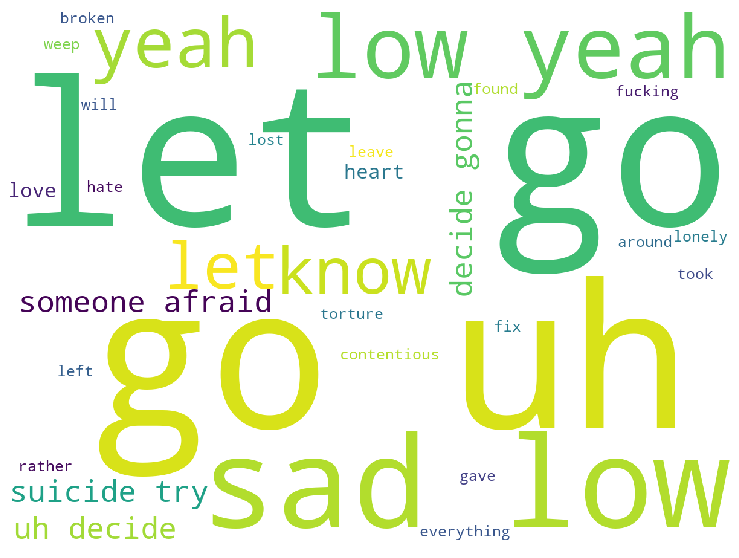

In [51]:
from wordcloud import WordCloud, STOPWORDS
text = (str(data.loc[8, 'lyrics']))
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color='white',width=1200,height=900).generate(text)
plt.imshow(wordcloud)
plt.title('')
plt.axis('off')
plt.show()

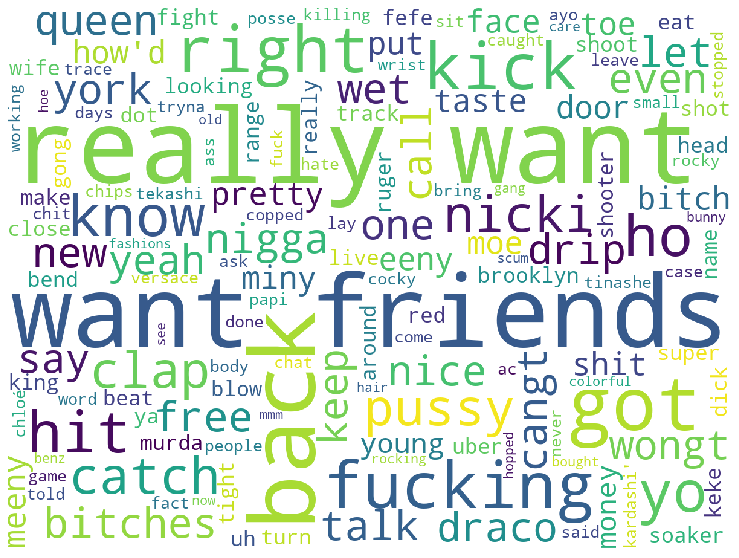

In [52]:
from wordcloud import WordCloud, STOPWORDS
text = (str(data.loc[9, 'lyrics']))
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color='white',width=1200,height=900).generate(text)
plt.imshow(wordcloud)
plt.title('')
plt.axis('off')
plt.show()

In [53]:
data.lyrics.value_counts()

astro yeah sun is down freezing cold that is how we already know winter is here my dawg would prolly do it for a louis belt that is just all he know he do not know nothing else i tried to show them yeah i tried to show them yeah yeah yeah yeah yeah gone on you with the pick and roll young laflame he in sicko mode woo made this here with all the ice on in the booth at the gate outside when they pull up they get me loose yeah jump out boys that is nike boys hopping out coupes this shit way too big when we pull up give me the loot gimme the loot was off the remy had a papoose had to hit my old town to duck the news two four hour lockdown we made no moves now it is 4 am and i am back up popping with the crew just landed in chase b mixes pop like jamba juice different colored chains think my jeweler really selling fruits and they choking man know the crackers wish it was a noose some some some someone said to win the retreat we all in too deep playing for keeps do not play us for weak someo

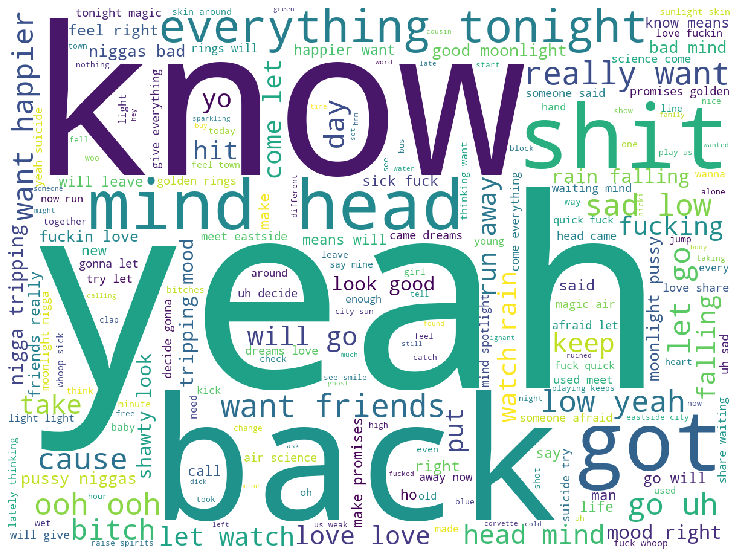

In [54]:
from wordcloud import WordCloud, STOPWORDS
text = (str(data.lyrics.values))
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color='white',width=1200,height=900).generate(text)
plt.imshow(wordcloud)
plt.title('')
plt.axis('off')
plt.show()

In [55]:
corpus = data.lyrics.values

In [56]:
#Cleaning
import re
corpus_dirty = ' '.join(corpus)
corpus_dirty = corpus_dirty.replace('.', '')
corpus_dirty = corpus_dirty.replace(',', '')
corpus_dirty = corpus_dirty.replace("/'", '')
corpus_dirty = corpus_dirty.replace("/d", '')
corpus_dirty = corpus_dirty.lower()
#print(corpus_dirty)


In [57]:
#Tokenization
tokens = [t for t in corpus_dirty.split()]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kelly\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


lately:5
thinking:6
want:36
happier:12
morning:1
comes:1
see:6
become:1
cold:2
light:14
day:7
flame:1
wind:1
fire:1
begun:1
every:5
argument:1
word:2
ca:1
take:9
back:21
cause:12
happened:1
think:4
know:36
way:4
story:1
ends:1
minute:4
change:3
mind:27
feel:14
right:22
raise:3
spirits:3
smile:3
means:6
leave:10
evening:1
falls:1
left:2
thoughts:1
image:1
someone:14
else:2
well:1
eating:1
inside:1
run:9
course:1
pretend:1
okay:1
jump:4
together:4
least:1
swim:1
far:1
away:12
wreck:1
made:5
go:29
even:4
though:1
might:2
like:50
old:5
days:3
could:2
say:10
shit:20
wanted:2
fake:2
orgasms:2
tell:3
niggas:14
today:4
hey:2
wanna:5
cum:2
mothafucka:2
fuckin:8
love:34
fuck:17
bitch:10
cousin:2
boyfriend:1
dork:2
mclovin:2
ooh:25
pulled:1
ghost:2
fucked:2
london:1
sister:1
nothing:3
uh:27
woo:3
getting:1
ignorant:1
lighter:1
ignant:2
yeah:72
water:2
neck:1
look:10
fell:3
went:1
fishing:1
much:2
diamonds:1
bust:1
what's:1
time:2
smokepurpp:1
sipping:1
drank:1
aye:1
lines:2
scoop:1
first:1
ask:2


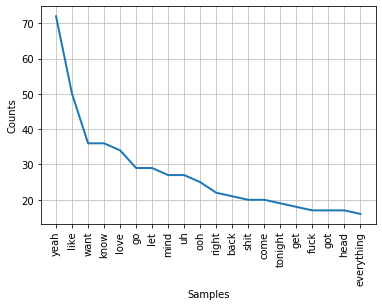

In [58]:
#word frequency
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
sr= stopwords.words('english')
clean_tokens = tokens[:]

for token in tokens:
    if token in stopwords.words('english'):
        
        clean_tokens.remove(token)
        
        
freq = nltk.FreqDist(clean_tokens)

for key,val in freq.items():
    print(str(key) + ':' + str(val))

freq.plot(20, cumulative=False)


In [73]:
from textblob import TextBlob

In [74]:
blob1 = TextBlob(str(corpus))

In [75]:
print(blob1.sentiment)

Sentiment(polarity=0.01706478109703922, subjectivity=0.5320341934051611)


In [86]:
stop_words=['a', 'able','about','across','after','all','almost','also','am','among','an','and','any','are','as','at','be',
            'because','been','by','did','else','ever','every','for','from','get','got','had','has','have','he','her','hers',
            'him','his','how','however','i','if','in','into','is','it','its','just','least','let','may','me','might','my','of',
            'off','on','or','other','our','own','rather','said','say','says','she','should','since','so','than','that','the',
            'their','them','then','there','these','they','this','tis','to','was','us','was','we','were','what','when','where',
            'while','who','whom','why','will','would','yet','you','your','They','Look','Good','A', 'Able','About','Across',
            'After','All','Almost','Also','Am','Among','An','And','Any','Are','As','At','Be','Because','Been','By','Did',
            'Else','Ever','Every','For','From','Get','Got','Had','Has','Have','He','Her','Hers','Him','His','How','However',
            'I','If','In','Into','Is','It','Its','Just','Least','Let','May','Me','Might','My','Of','Off','On','Or','Other',
            'Our','Own','Rather','Said','Say','Says','She','Should','Since','So','Than','That','The','Their','Them','Then',
            'There','These','They','This','Tis','To','Was','Us','Was','We','Were','What','When','Where','While','Who','Whom',
            'Why','Will','Would','Yet','You','Your', 'yeah', 'ooh', 'uh', 'fuckin','!','@','#','"','$','(','.',')']       

In [93]:
data.head()

,song_name,artist_name,song_popularity,lyrics,length,clean,clean_len,token,unique
0,Happier,Marshmello,100,lately i have been i have been thinking i want...,1874,"[lately, thinking, want, happier, want, happie...",178,"[lately, i, have, been, i, have, been, thinkin...",0.094984
1,I Love It (& Lil Pump),Kanye West,99,cause you know in the old days they could not ...,1888,"[cause, know, old, days, could, not, shit, wan...",212,"[cause, you, know, in, the, old, days, they, c...",0.112288
2,Promises (with Sam Smith),Calvin Harris,98,are you drunk enough not to judge what i am do...,1697,"[drunk, enough, not, judge, doing, high, enoug...",194,"[are, you, drunk, enough, not, to, judge, what...",0.114319
3,Eastside (with Halsey & Khalid),benny blanco,98,uh yeah yeah when i was young i fell in love w...,2252,"[young, fell, love, used, hold, hands, man, en...",253,"[uh, yeah, yeah, when, i, was, young, i, fell,...",0.112345
4,SICKO MODE,Travis Scott,97,astro yeah sun is down freezing cold that is h...,3715,"[astro, sun, down, freezing, cold, already, kn...",402,"[astro, yeah, sun, is, down, freezing, cold, t...",0.108210


In [79]:
data['length']= data['lyrics'].apply(lambda x: len(x))

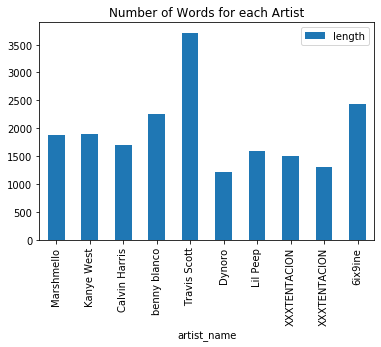

In [80]:
data.plot.bar(x='artist_name', y='length', title='Number of Words for each Artist');
plt.show();

Travis Scott é o artista com maior número de palavras.Uma outra métrica útil, é o número de palavras únicas utilizadas. Mas também pode ser enviesada pela quantidade de palavras na letra. Podemos utilizar a proporção de palavras diferentes na música. 


In [81]:
df=data

In [82]:
df['clean'] = 0

In [83]:
df['clean_len'] = 0

In [84]:
df['token'] = df['lyrics'].apply(lambda x: (word_tokenize(x)))

In [87]:
df['clean'] = df['token'].apply(lambda x: [item for item in x if item not in stop_words and item not in ['yeah', 'ooh', 'uh', 'fuckin']])
df['clean_len'] = df['clean'].apply(lambda x: len(x))
df.head()

,song_name,artist_name,song_popularity,lyrics,length,clean,clean_len,token
0,Happier,Marshmello,100,lately i have been i have been thinking i want...,1874,"[lately, thinking, want, happier, want, happie...",178,"[lately, i, have, been, i, have, been, thinkin..."
1,I Love It (& Lil Pump),Kanye West,99,cause you know in the old days they could not ...,1888,"[cause, know, old, days, could, not, shit, wan...",212,"[cause, you, know, in, the, old, days, they, c..."
2,Promises (with Sam Smith),Calvin Harris,98,are you drunk enough not to judge what i am do...,1697,"[drunk, enough, not, judge, doing, high, enoug...",194,"[are, you, drunk, enough, not, to, judge, what..."
3,Eastside (with Halsey & Khalid),benny blanco,98,uh yeah yeah when i was young i fell in love w...,2252,"[young, fell, love, used, hold, hands, man, en...",253,"[uh, yeah, yeah, when, i, was, young, i, fell,..."
4,SICKO MODE,Travis Scott,97,astro yeah sun is down freezing cold that is h...,3715,"[astro, sun, down, freezing, cold, already, kn...",402,"[astro, yeah, sun, is, down, freezing, cold, t..."


In [88]:
df['unique'] = (df['clean_len']/(df['length']))#*100
df.head(10)

,song_name,artist_name,song_popularity,lyrics,length,clean,clean_len,token,unique
0,Happier,Marshmello,100,lately i have been i have been thinking i want...,1874,"[lately, thinking, want, happier, want, happie...",178,"[lately, i, have, been, i, have, been, thinkin...",0.094984
1,I Love It (& Lil Pump),Kanye West,99,cause you know in the old days they could not ...,1888,"[cause, know, old, days, could, not, shit, wan...",212,"[cause, you, know, in, the, old, days, they, c...",0.112288
2,Promises (with Sam Smith),Calvin Harris,98,are you drunk enough not to judge what i am do...,1697,"[drunk, enough, not, judge, doing, high, enoug...",194,"[are, you, drunk, enough, not, to, judge, what...",0.114319
3,Eastside (with Halsey & Khalid),benny blanco,98,uh yeah yeah when i was young i fell in love w...,2252,"[young, fell, love, used, hold, hands, man, en...",253,"[uh, yeah, yeah, when, i, was, young, i, fell,...",0.112345
4,SICKO MODE,Travis Scott,97,astro yeah sun is down freezing cold that is h...,3715,"[astro, sun, down, freezing, cold, already, kn...",402,"[astro, yeah, sun, is, down, freezing, cold, t...",0.108210
5,In My Mind,Dynoro,97,in my mind in my head this is where we all cam...,1219,"[mind, head, came, dreams, love, share, waitin...",62,"[in, my, mind, in, my, head, this, is, where, ...",0.050861
6,Falling Down,Lil Peep,97,come let is watch the rain as it is falling do...,1584,"[come, watch, rain, falling, down, yo, do, son...",169,"[come, let, is, watch, the, rain, as, it, is, ...",0.106692
7,Moonlight,XXXTENTACION,96,yeah spotlight uh moonlight uh nigga why you t...,1503,"[spotlight, moonlight, nigga, tripping, mood, ...",167,"[yeah, spotlight, uh, moonlight, uh, nigga, wh...",0.111111
8,SAD!,XXXTENTACION,96,yeah who am i someone that's afraid to let go ...,1303,"[someone, 's, afraid, go, decide, gon, na, kno...",115,"[yeah, who, am, i, someone, that, 's, afraid, ...",0.088258
9,FEFE (feat. Nicki Minaj & Murda Beatz),6ix9ine,96,it is fucking it is king of new york looking f...,2440,"[fucking, king, new, york, looking, queen, rig...",339,"[it, is, fucking, it, is, king, of, new, york,...",0.138934


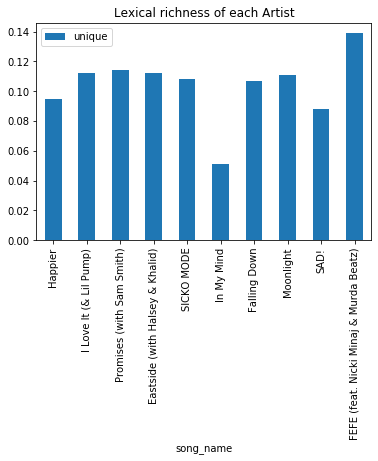

In [89]:
df.plot.bar(x='song_name', y='unique', title='Lexical richness of each Artist')
plt.show();    

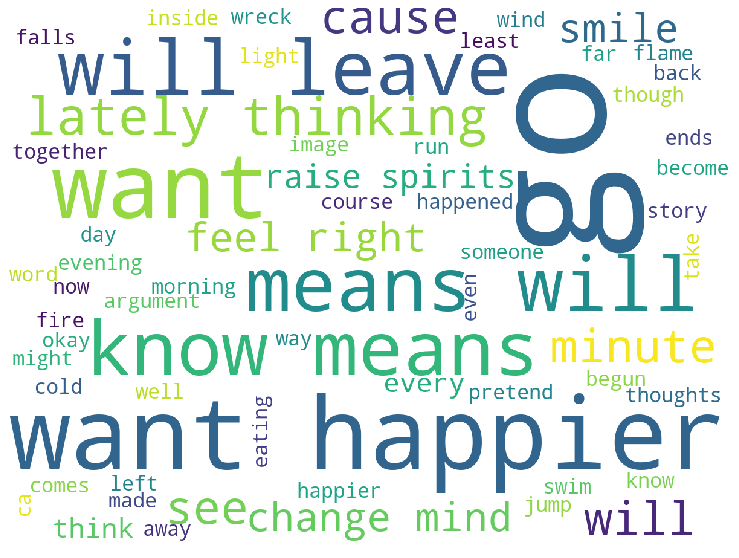

In [90]:
#Wordcloud Happier
from wordcloud import WordCloud, STOPWORDS
text = (str(df.loc[0, 'lyrics']))
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color='white',width=1200,height=900).generate(text)
plt.imshow(wordcloud)
plt.title('')
plt.axis('off')
plt.show()

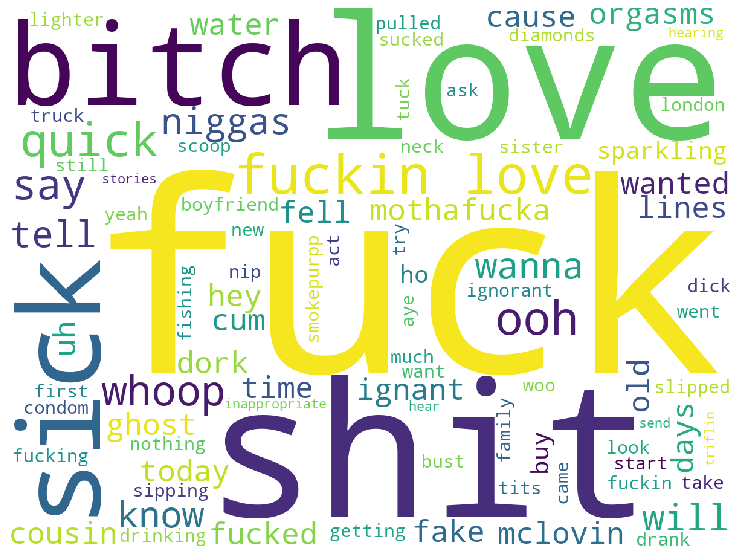

In [91]:
from wordcloud import WordCloud, STOPWORDS
text = (str(df.loc[1, 'lyrics']))
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color='white',width=1200,height=900).generate(text)
plt.imshow(wordcloud)
plt.title('')
plt.axis('off')
plt.show()

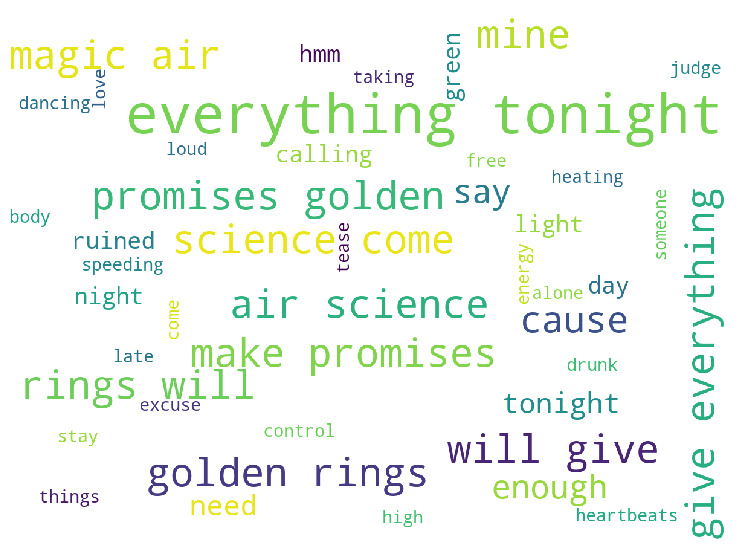

In [92]:
from wordcloud import WordCloud, STOPWORDS
text = (str(df.loc[2, 'lyrics']))
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color='white',width=1200,height=900).generate(text)
plt.imshow(wordcloud)
plt.title('')
plt.axis('off')
plt.show()

# Análise de Sentimento

Utilizando análise de sentimento para descrever se as letras são positivas, negativas ou neutras. 

## Vader Sentiment analyzer

In [94]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [95]:
df_vader = data
df_vader.head()

,song_name,artist_name,song_popularity,lyrics,length,clean,clean_len,token,unique
0,Happier,Marshmello,100,lately i have been i have been thinking i want...,1874,"[lately, thinking, want, happier, want, happie...",178,"[lately, i, have, been, i, have, been, thinkin...",0.094984
1,I Love It (& Lil Pump),Kanye West,99,cause you know in the old days they could not ...,1888,"[cause, know, old, days, could, not, shit, wan...",212,"[cause, you, know, in, the, old, days, they, c...",0.112288
2,Promises (with Sam Smith),Calvin Harris,98,are you drunk enough not to judge what i am do...,1697,"[drunk, enough, not, judge, doing, high, enoug...",194,"[are, you, drunk, enough, not, to, judge, what...",0.114319
3,Eastside (with Halsey & Khalid),benny blanco,98,uh yeah yeah when i was young i fell in love w...,2252,"[young, fell, love, used, hold, hands, man, en...",253,"[uh, yeah, yeah, when, i, was, young, i, fell,...",0.112345
4,SICKO MODE,Travis Scott,97,astro yeah sun is down freezing cold that is h...,3715,"[astro, sun, down, freezing, cold, already, kn...",402,"[astro, yeah, sun, is, down, freezing, cold, t...",0.108210


In [51]:
df_vader['clean'][0]

['lately',
 'thinking',
 'want',
 'happier',
 'want',
 'happier',
 'morning',
 'comes',
 'see',
 'become',
 'cold',
 'light',
 'day',
 'flame',
 'wind',
 'not',
 'fire',
 'begun',
 'argument',
 'word',
 'ca',
 'not',
 'take',
 'back',
 'cause',
 'with',
 'happened',
 'think',
 'both',
 'know',
 'way',
 'story',
 'ends',
 'only',
 'minute',
 'want',
 'change',
 'mind',
 'cause',
 'do',
 'not',
 'feel',
 'right',
 'want',
 'raise',
 'spirits',
 'want',
 'see',
 'smile',
 'but',
 'know',
 'means',
 'leave',
 'know',
 'means',
 'leave',
 'lately',
 'thinking',
 'want',
 'happier',
 'want',
 'happier',
 'evening',
 'falls',
 'left',
 'with',
 'thoughts',
 'image',
 'being',
 'with',
 'someone',
 'well',
 'eating',
 'up',
 'inside',
 'but',
 'run',
 'course',
 'pretend',
 'okay',
 'now',
 'jump',
 'together',
 'can',
 'swim',
 'far',
 'away',
 'wreck',
 'made',
 'only',
 'minute',
 'want',
 'change',
 'mind',
 'cause',
 'do',
 'not',
 'feel',
 'right',
 'want',
 'raise',
 'spirits',
 'want',

In [96]:
df_vader['lyrics_clean'] = [','.join(map(str,l)) for l in df_vader['clean']]
df_vader['lyrics_clean'] = df_vader['lyrics_clean'].str.replace(',', ' ')

In [97]:
df_vader.head(1)

,song_name,artist_name,song_popularity,lyrics,length,clean,clean_len,token,unique,lyrics_clean
0,Happier,Marshmello,100,lately i have been i have been thinking i want...,1874,"[lately, thinking, want, happier, want, happie...",178,"[lately, i, have, been, i, have, been, thinkin...",0.094984,lately thinking want happier want happier morn...


In [58]:
df_vader['lyrics_clean'].value_counts()

astro sun down freezing cold already know winter here dawg prolly do louis belt know do not know nothing tried show tried show gone with pick roll young laflame sicko mode woo made here with ice booth gate outside pull up loose jump out boys nike boys hopping out coupes shit way too big pull up give loot gim loot remy papoose hit old town duck news two four hour lockdown made no moves now 4 back up popping with crew landed chase b mixes pop like jamba juice different colored chains think jeweler really selling fruits choking man know crackers wish noose some some some someone win retreat too deep playing keeps do not play weak someone win retreat too deep playing keeps do not play weak shit way too formal know do not follow suit stacey dash most girls not clue hoes made records produced take exes put group hit need bootch turn function bonnaroo told hop coming too 305 bitches treat like uncle luke do not stop pop pussy slop top roof going moon not even make room thought ocean pool now 

In [98]:
sid.polarity_scores(df_vader['lyrics_clean'][0])

{'neg': 0.066, 'neu': 0.541, 'pos': 0.392, 'compound': 0.9968}

In [99]:
df_vader['polarity_scores']= df_vader['lyrics_clean'].apply(lambda x: sid.polarity_scores(x))

In [100]:
df_vader.head(2)

,song_name,artist_name,song_popularity,lyrics,length,clean,clean_len,token,unique,lyrics_clean,polarity_scores
0,Happier,Marshmello,100,lately i have been i have been thinking i want...,1874,"[lately, thinking, want, happier, want, happie...",178,"[lately, i, have, been, i, have, been, thinkin...",0.094984,lately thinking want happier want happier morn...,"{'neg': 0.066, 'neu': 0.541, 'pos': 0.392, 'co..."
1,I Love It (& Lil Pump),Kanye West,99,cause you know in the old days they could not ...,1888,"[cause, know, old, days, could, not, shit, wan...",212,"[cause, you, know, in, the, old, days, they, c...",0.112288,cause know old days could not shit wanted fake...,"{'neg': 0.344, 'neu': 0.325, 'pos': 0.33, 'com..."


In [101]:
polarity_scores=pd.DataFrame(df_vader.polarity_scores.to_dict()).T
polarity_scores.head(2)

,compound,neg,neu,pos
0,0.9968,0.066,0.541,0.392
1,-0.8591,0.344,0.325,0.330


In [102]:
df_final=pd.concat([df_vader, polarity_scores], axis=1)

In [103]:
df_final

,song_name,artist_name,song_popularity,lyrics,length,clean,clean_len,token,unique,lyrics_clean,polarity_scores,compound,neg,neu,pos
0,Happier,Marshmello,100,lately i have been i have been thinking i want...,1874,"[lately, thinking, want, happier, want, happie...",178,"[lately, i, have, been, i, have, been, thinkin...",0.094984,lately thinking want happier want happier morn...,"{'neg': 0.066, 'neu': 0.541, 'pos': 0.392, 'co...",0.9968,0.066,0.541,0.392
1,I Love It (& Lil Pump),Kanye West,99,cause you know in the old days they could not ...,1888,"[cause, know, old, days, could, not, shit, wan...",212,"[cause, you, know, in, the, old, days, they, c...",0.112288,cause know old days could not shit wanted fake...,"{'neg': 0.344, 'neu': 0.325, 'pos': 0.33, 'com...",-0.8591,0.344,0.325,0.330
2,Promises (with Sam Smith),Calvin Harris,98,are you drunk enough not to judge what i am do...,1697,"[drunk, enough, not, judge, doing, high, enoug...",194,"[are, you, drunk, enough, not, to, judge, what...",0.114319,drunk enough not judge doing high enough excus...,"{'neg': 0.18, 'neu': 0.71, 'pos': 0.11, 'compo...",-0.9274,0.180,0.710,0.110
3,Eastside (with Halsey & Khalid),benny blanco,98,uh yeah yeah when i was young i fell in love w...,2252,"[young, fell, love, used, hold, hands, man, en...",253,"[uh, yeah, yeah, when, i, was, young, i, fell,...",0.112345,young fell love used hold hands man enough gre...,"{'neg': 0.074, 'neu': 0.783, 'pos': 0.143, 'co...",0.9762,0.074,0.783,0.143
4,SICKO MODE,Travis Scott,97,astro yeah sun is down freezing cold that is h...,3715,"[astro, sun, down, freezing, cold, already, kn...",402,"[astro, yeah, sun, is, down, freezing, cold, t...",0.108210,astro sun down freezing cold already know wint...,"{'neg': 0.157, 'neu': 0.628, 'pos': 0.215, 'co...",0.9769,0.157,0.628,0.215
5,In My Mind,Dynoro,97,in my mind in my head this is where we all cam...,1219,"[mind, head, came, dreams, love, share, waitin...",62,"[in, my, mind, in, my, head, this, is, where, ...",0.050861,mind head came dreams love share waiting mind ...,"{'neg': 0.0, 'neu': 0.446, 'pos': 0.554, 'comp...",0.9944,0.000,0.446,0.554
6,Falling Down,Lil Peep,97,come let is watch the rain as it is falling do...,1584,"[come, watch, rain, falling, down, yo, do, son...",169,"[come, let, is, watch, the, rain, as, it, is, ...",0.106692,come watch rain falling down yo do song peep s...,"{'neg': 0.198, 'neu': 0.587, 'pos': 0.215, 'co...",0.9395,0.198,0.587,0.215
7,Moonlight,XXXTENTACION,96,yeah spotlight uh moonlight uh nigga why you t...,1503,"[spotlight, moonlight, nigga, tripping, mood, ...",167,"[yeah, spotlight, uh, moonlight, uh, nigga, wh...",0.111111,spotlight moonlight nigga tripping mood right ...,"{'neg': 0.283, 'neu': 0.577, 'pos': 0.141, 'co...",-0.9842,0.283,0.577,0.141
8,SAD!,XXXTENTACION,96,yeah who am i someone that's afraid to let go ...,1303,"[someone, 's, afraid, go, decide, gon, na, kno...",115,"[yeah, who, am, i, someone, that, 's, afraid, ...",0.088258,someone 's afraid go decide gon na know suicid...,"{'neg': 0.566, 'neu': 0.362, 'pos': 0.073, 'co...",-0.9985,0.566,0.362,0.073
9,FEFE (feat. Nicki Minaj & Murda Beatz),6ix9ine,96,it is fucking it is king of new york looking f...,2440,"[fucking, king, new, york, looking, queen, rig...",339,"[it, is, fucking, it, is, king, of, new, york,...",0.138934,fucking king new york looking queen right one ...,"{'neg': 0.16, 'neu': 0.521, 'pos': 0.319, 'com...",0.9976,0.160,0.521,0.319


In [104]:
df_plot= df_final[['song_name', 'compound', 'neg','pos', 'neu']]

In [106]:
df_plot['compound']=df_plot['compound']*100
df_plot['neg']=df_plot['neg']*100
df_plot['pos']=df_plot['pos']*100
df_plot['neu']=df_plot['neu']*100
df_plot


C:\Users\kelly\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\kelly\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\kelly\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,song_name,compound,neg,pos,neu
0,Happier,9968.0,660.0,3920.0,5410.0
1,I Love It (& Lil Pump),-8591.0,3440.0,3300.0,3250.0
2,Promises (with Sam Smith),-9274.0,1800.0,1100.0,7100.0
3,Eastside (with Halsey & Khalid),9762.0,740.0,1430.0,7830.0
4,SICKO MODE,9769.0,1570.0,2150.0,6280.0
5,In My Mind,9944.0,0.0,5540.0,4460.0
6,Falling Down,9395.0,1980.0,2150.0,5870.0
7,Moonlight,-9842.0,2830.0,1410.0,5770.0
8,SAD!,-9985.0,5660.0,730.0,3620.0
9,FEFE (feat. Nicki Minaj & Murda Beatz),9976.0,1600.0,3190.0,5210.0


Sobre os scores:

compound = ('pontuação composta normalizada e ponderada')soma das pontuações de valência de cada palavra no léxico, ajustadas de acordo com as regras e, em seguida, normalizadas para estar entre -1 e +1. Essa é a métrica utilizada como resultado da análise.

positive sentiment = compound score >= 0.05
neutral sentiment = (compound score > -0.05) e (compound score < 0.05)
negative sentiment = compound score <= -0.05


In [152]:
#df_plot.to_csv('plot.csv')

In [153]:
df_plot.drop('compound', axis=1, inplace=True)

C:\Users\kelly\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


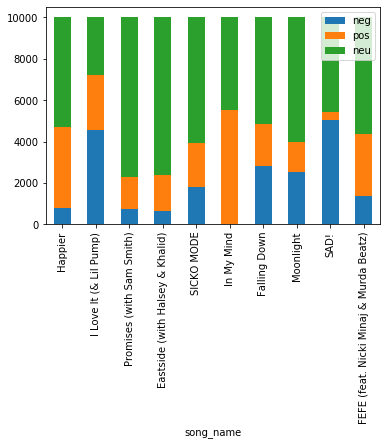

In [154]:
df_plot.plot.bar(x='song_name', stacked=True)
plt.show()     